# Instalación

**Los datos necesarios para realizar la práctica están en una carpeta compartida que se llama `data`, situada en "Shared with me". Para que el cuaderno pueda acceder a ella es necesario crear un link en "My Drive". El link se crea simplemente seleccionando "data", y desde el menu del botón derecho seleccione "Add a shortcut to Drive".**

**Una vez hecho esto, ejecute la siguiente celda. Esta celda montará el directorio de trabajo del cuaderno y verá la carpeta `data` a través del link. Para montar el directorio le pedirá que se registre en "Drive"**.


In [16]:
## Instalación: esta celda monta el directorio de trabajo
if 'google.colab' in str(get_ipython()):
    # Setup colab
    from google.colab import drive
    drive.mount('/drive')
    %cd /drive/My Drive/data
else:
    pass

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
/drive/.shortcut-targets-by-id/1MHsiAeNCqIWHIkKgK7ggxOaSkemKqWSb/data


# Modelo lineal

En el tutorial hemos aprendido a construir redes neuronales, comenzando por las unidades básicas: *neuronas* o *unidades lineales*. Se ha visto que una neurona (o unidad lineal) puede modelar los datos de una base de datos de forma lineal, a través de un problema convencional de regresión lineal. Para comenzar con Keras, vamos a construir un modelo lineal. Antes de comenzar, ejecute la siguiente celda para configurar el sistema.

In [17]:
# Setup Tensorflow
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

La base de datos *Red Wine Quality* consiste en un conjunto de parámetros físico-químicos sobre 1600 vinos tintos Portugueses. Además, cada vino tiene una puntuación de su calidad, obtenida mediante catas a ciegas. En primer lugar, vamos a visualizar las primeras filas de la base de datos.

In [18]:
import pandas as pd
red_wine = pd.read_csv('data_m3/datasets/red-wine.csv')
red_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Podemos usar el atributo `shape` de Numpy para obtener el número de filas y columnas de un array.

In [19]:
[filas, columnas] = red_wine.shape # (rows, columns)

## 1) Dimensiones de la entrada #

El problema consiste en predecir la calidad del vino a partir de las medidas físico-químicas, de tal manera que, una vez entrenada, sea la red neuronal la que juegue el papel de los expertos catadores!!. El objetivo es el parámetro `'quality'`, almacenado en la última columna de la base de datos. Las columnas restantes son las características o descriptores del vino en cuestión. ¿Cómo deberíamos configurar el parámetro `input_shape` para realizar un modelo en Keras?. Recuerde que `input_shape` debe ser una lista.

In [20]:
# EJERCICIO 1 --------- TO DO

my_input_shape = [columnas-1]
print(my_input_shape)

print(type(my_input_shape))

[11]
<class 'list'>


## 2) Definir el modelo

Ahora vamos a definir un modelo lineal basado en una única neurona (unidad lineal) para esta tarea. Configure adecuadamente los parámetros de `layers.Dense`.

In [21]:
# EJERCICIO 2 --------- TO DO
model = keras.Sequential(layers.Dense(units=1,input_shape = my_input_shape))


## 3) Extracción de los pesos
Keras representa los datos de entrada, salida y los pesos de una red neuronal como **tensores**. Los tensores son el tipo de dato de TensorFlow's para la gestión de matrices o arrays multidimensionales. Es necesario utilizar esta nueva estructura para poder adaptar el modelo al esquema computacional de Tensorflow, y en particular al esquema computacional de las GPUs. Cuando definimos el argumento `input_shape`, estamos configurando las dimensiones del tensor necesario para almacenar cada experimento de la base de datos. Por ejemplo, si configuramos `input_shape=[3]` estamos creando un tensor que admite tres características por cada muestra de la base de datos, que suele almacenarse en una fila. Por otro lado, los pesos son almacenados en el atributo `weights` del modelo, es decir (`model.weights`), como una lista de tensores. Obtenga y muestre los pesos del modelo que definió anteriormente. 

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;">
<strong>Nota:</strong><br> 

La función `print` ya está preparada para visualizar los pesos.
</blockquote>

In [22]:
# EJERCICIO 3 --------- TO DO
w, b = model.weights
print("Weights:\n{}\n\nBias:\n{}".format(w, b))

Weights:
<tf.Variable 'dense_10/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[ 0.5109771 ],
       [-0.06991637],
       [-0.2187661 ],
       [-0.26821834],
       [-0.09748298],
       [ 0.5610978 ],
       [ 0.11531949],
       [ 0.13942987],
       [ 0.19058806],
       [ 0.55015594],
       [ 0.692408  ]], dtype=float32)>

Bias:
<tf.Variable 'dense_10/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


## 4) Salida de un modelo lineal, sin entrenamiento
 
El modelo lineal planteado es un caso particular del problema clásico de regresión, donde el objetivo es predecir un valor numérico que en principio no está acotado ni condicionado a ningún rango de valores concreto. El problema tradicionalmente se resuelve mediante mínimos cuadrados, y la solución es la recta (o la curva) que mejor se ajusta a los datos. En la celda siguiente asumimos un modelo lineal, con una única neurona y una única característica de entrada, sin ningún proceso de ajuste. 

En la inicialización de las variables, Keras ajusta los pesos aleatoriamente. En la siguiente celda se ejecuta la red sobre unos datos de entrada `x` y se observa que la respuesta de la red es una recta. Si ejecutamos la siguiente celda varias veces veremos el efecto de los pesos inicializados aleatoriamente.

4/4 [==============================] - 0s 3ms/step


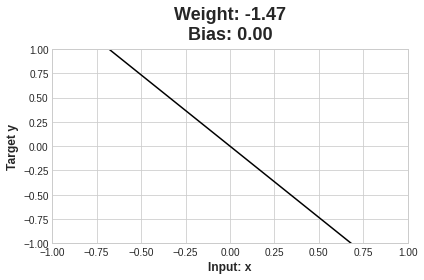

In [23]:
# EJERCICIO 4 --------- EJECUTAR VARIAS VECES
model = keras.Sequential([
    layers.Dense(1, input_shape=[1]),
])

x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)

plt.figure()
plt.plot(x, y, 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights # you could also use model.get_weights() here
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;">
<strong>Nota:</strong><br> 

Nota: en esta aplicación, el proceso de entrenamiento sería el proceso de ajuste, que equivale a  un problema de regresión tradicional.
</blockquote>

# Modelo no lineal

En el tutorial se han configurado pilas de capas que conforman un modelo secuencial. Como se ha comentado, al añadir funciones de activación en las capas dotamos a la red de la herramienta adecuada para aprender relaciones no lineales en los datos, construyendo estructuras complejas para extraer la información. A continuación vamos a construir una red con varias capas internas, explorando las funciones de activación. En este caso usaremos una base de datos denominada `Concrete`, la cual contiene las proporciones de cada uno de los componentes para la fabricación de hormigón, junto con la resistencia a la compresión. La resistencia es el parámetro a predecir. A continuación se carga la base de datos:

In [24]:
import pandas as pd
concrete = pd.read_csv('data_m3/datasets/concrete.csv')
concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## 1) Dimensiones de la entrada
La variable a determinar es la columna `'Strength'`, las columnas restantes son las características que usaremos como entrada. ¿Cual es la dimensión de la entrada?

In [25]:
# EJERCICIO 5 --------- TO DO
filas, columnas = concrete.shape
input_shape_concrete = [columnas-1]
print(input_shape_concrete)

print(type(input_shape_concrete))

[8]
<class 'list'>


## 2) Definición del modelo
A continuación vamos a crear un modelo con tres capas ocultas, cada una con 512 unidades y una función de activación ReLU. Es necesario incluir una capa de salida con una única unidad y sin activación, ya que los problemas de regresión no tienen limitaciones en la salida. En la primera capa hay que especificar las dimensiones de la entrada, que se almacenan en `input_shape`.

In [26]:
# EJERCICIO 6 --------- TO DO
model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=512, activation='relu', input_shape=input_shape_concrete),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=512, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1),
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               4608      
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dense_14 (Dense)            (None, 512)               262656    
                                                                 
 dense_15 (Dense)            (None, 1)                 513       
                                                                 
Total params: 530,433
Trainable params: 530,433
Non-trainable params: 0
_________________________________________________________________


## 3) Capas de activación
Lo normal es incluir la función de activación en la definición de la capa `Dense`, como se ha hecho en el caso anterior con el argumento `activation`. Otra opción es configurar la función de activación como una capa de activación, esto es más flexible, porque a veces interesa hacer transformaciones intermedias, entre las unidades lineales y la activación. En este último caso quedaría así:
```
layers.Dense(units=8),
layers.Activation('relu')
```
lo cual es equivalente a:

`layers.Dense(units=8, activation='relu')`.

Modifique el código para que cada activación actúe como una capa de activación independiente, la cual no utiliza neuronas.

In [27]:
# EJERCICIO 7 --------- TO DO
model =keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=512, input_shape=input_shape_concrete),
    layers.Activation('relu'),
    layers.Dense(units=512),
    layers.Activation('relu'),
    layers.Dense(units=512),
    layers.Activation('relu'),
    # the linear output layer 
    layers.Dense(units=1),
])

model.summary()



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 512)               4608      
                                                                 
 activation_4 (Activation)   (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 512)               262656    
                                                                 
 activation_5 (Activation)   (None, 512)               0         
                                                                 
 dense_18 (Dense)            (None, 512)               262656    
                                                                 
 activation_6 (Activation)   (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 1)                

## 4) Alternativas a ReLU
Existen muchas variantes a la función de activación  `'relu'`, por ejemplo: `'elu'`, `'selu'`, `'swish'`. Todas estas están implementadas en Keras. En ocasiones, dependiendo del problema, unas funcionan mejor que otras. Afortunadamente es sencillo cambiar y experimentar con diferentes funciones, aún así, ReLU suele ser la más utilizada en la mayoría de problemas y suele ser la mejor forma de comenzar. En el siguiente código se representan algunas [funciones de activación](https://www.tensorflow.org/api_docs/python/tf/keras/activations), pruébelas y represéntelas en gráficas diferentes para que se puedan comparar

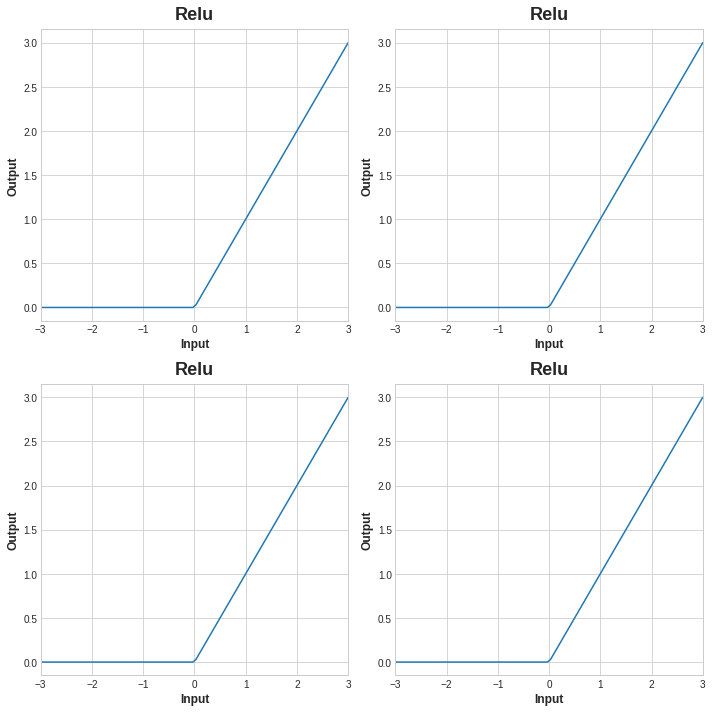

In [28]:
# EJERCICIO 8 --------- TO DO
# Completar y/o modificar el código para que se muestre un gráfico con cada una de las funciones de activación.
# usar 'relu', 'elu', 'selu', 'swish'... o alguna más y representarlas
activation_layer = layers.Activation('relu')

x = tf.linspace(-3.0, 3.0, 100)
y_relu = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.plot(x, y_relu)
plt.title('Relu')
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
#
plt.subplot(2, 2, 2)
plt.plot(x, y_relu)
plt.title('Relu')
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
#
plt.subplot(2, 2, 3)
plt.plot(x, y_relu)
plt.title('Relu')
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
#
plt.subplot(2, 2, 4)
plt.plot(x, y_relu)
plt.title('Relu')
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")

plt.show()

# Preguntas

**La adquisición de las competencias asociadas a las prácticas requieren una explicación propia y rigurosa. Las copias y traducciones literales no demuestran la adquisición de las competencias, por tanto no se considerarán válidas (consultar la rúbrica).**

<div class="alert alert-success">
1. ¿Por qué se requieren funciones de activación?
</div>

%%%% TO DO %%%%% 
Las funciones de activación hacen referencia a funciones matemáticas no lineales empleadas a la salida de cada capa de la red. Estas funciones se emplean para romper el hecho de que la salida de una neurona, por defecto, es lineal, fruto de obtener la salida como la ecuación de una recta.

Es por esto que se emplean las funciones de activación, para proporcionarle flexibilidad a las soluciones de la red obteniendo soluciones que no sean lineales.


<div class="alert alert-success">
2. ¿Cuál es la diferencia entre una unidad lineal y una ReLu?
</div>

%%%% TO DO %%%%%

Llamamos unidad lineal a la unidad básica de la red neuronal, es decir, la neurona. El hecho de denominarlo de esta forma es porque si solo usamos una neurona, unicamente podemos obtener resultados lineales en base a la ecuación de la recta "y=wx +b".

Una ReLu es una función de activavicón ubicada a la salida de cada una de las capas. Estas funciones de activación se usan precisamente para romper con la linealidad propia de la unidad lineal. Tal y como se ha explicado en el apartado anterior.

Dicho esto, podemos determinar que la diferencia entre estos dos terminos es que el primero es la estruxtura básica y mínima de las redes neuronales (una neurona), y la segunda es una herramienta que empleamos para darle mayor flexibilidad a las neuronas, evitando el hecho de que por defecto proporcionen resultados lineales.


<div class="alert alert-success">
3. Sea un modelo como el siguiente:

``` python

model = keras.Sequential([
layers.Dense(32, activation='relu', input_shape=[8]),
layers.Dense(32, activation='relu'),
layers.Dense(1)])
```
    
¿Cuál es el número de capas ocultas?

</div>

%%%% TO DO %%%%% 

Las capas ocultas son todas aquellas capas encontradas entre los datos de entrada y la capa de salida, desde la cual obtenemos el resultado de la red.

En este ejemplo, tenemos dos capas ocultas, con 32 neuronas cada una y conexiones de tipo denso. El hecho de que sean capas densas, implica que la salida de cada neurona se conecta con todas las neuronas de la capa siguiente, dando una combinación "todas con todas".


<div class="alert alert-success">
4. Cuál es el cometido de la función: `model.predict`
</div>

%%%% TO DO %%%%% 

La función predict() nos permite tener una prediccion
de la salida de la red en base a las muestras de entrada.

Para hacer esto, la función realiza una serie de cálculos sobre conjuntos de datos o lotes. 
La función trabaja con estos lotes por la propia construccion de la misma, ya que internamente está diseñada para el procesamiento de datos en lotes con un gran número de entradas. 

Es interesante recalcar, que en base a la explicación de la función, no se tolera el uso de la función dentro de bucles que iteren sobre sus datos y tengan pocas cantidades de entradas simultaneas.
Para estos casos, donde tenemos lotes pequeños, recomiendan el uso de la funcion "__call__()" para poder tener una ejecución más rápida.


<div class="alert alert-success">
5. En el ejercicio 4. ¿Por qué cada vez que se ejecuta sale un resultado diferente?


</div>

%%%% TO DO %%%%% 

El hecho de que tras cada ejecución tengamos un resultado diferente, se explica por el funcionamiento interno de Keras.

Keras, tal y como se comenta en el apartado del ejercicio 4, establece unos pesos aleatorios para cada una de las entradas de la red.
Como al ejecutar la celda de nuevo, se ejecuta todo como si fuese la primera vez, tendremos una nueva adjudicación de pesos completamente diferente al caso previo.

Esto implica necesariamente que al hacer el "plot" en el cual mostramos los pesos de las entradas, la ecuación de la recta "y=wx+b" varíe, al haber cambiado "w".

<div class="alert alert-success">
6. ¿Qué es una "fully connected network"? ¿La red del ejercicio 6 es de este tipo?
</div>

%%%% TO DO %%%%%

En el ejercicio 6 lo que tenemos es una red neuronal con 8 entradas, y 3 capas de 512 neuronas entre los datos de entrada y la salida. Es decir, 3 capas ocultas.
 
Cada una de estas capas esta configurada de forma densa. Esto quiere decir que las conexiones entre la salida de una neurona y la entrada de la neurona de la capa siguiente se hace todas con todas. En este caso, cada neurona de la capa oculta 1 tendrá 512 salidas, una para cada neurona de la capa oculta 2, y esto ocurre para las 512 neuronas de la capa oculta 1. 

Esta precisamente es la definición de una red neuronal de tipo "fully connected", el tener una red cuyas capas presenten una conexion de tipo denso.


<div class="alert alert-success">
7. ¿Cuantos parámetros entrenables (pesos y bias) tiene el modelo del ejercicio 6? Explicar la fórmula que le permite calcularlo.
</div>

%%%% TO DO %%%%% 

Para poder determinar los parámetros del entrenamiento, debemos fijarnos en la capa de entrada. En mi caso, en la variable "input_shape_concrete" tengo guardado el número de columnas de la tabla menos uno, al ser la cantidad de datos de entrada de la red.

Este dato es relevante, pues cada una de estas entradas tendrá asociado un peso determinado.

Adicionalmente, si nos fijamos en la topografía completa de la red, observamos que tenemos una capa de salida, y tres capas ocultas. Este dato es clave, puesto que tendremos un bias por cada una de las capas y uno adicional que se pasa a la red junto a los parámetros de entrada.

El parámetro bias no tiene ningún parámetro de entrada asociado, sino que es un valor que debe determinar la red. Este valor se agrega a la entrada de cada neurona de una capa a modo de offset.

Dicho todo esto, podemos determiar las fórmulas de de los pesos y bias de la siguiente forma:



  pesos = parámetros_de_entrada_de_la_red.

  bias = Numero_capas_ocultas + 1.
  
  Donde el 1 del final proviene del bio usado para la primera capa oculta, tal 
  como se muestra en la imagen 1.

  <figure style="padding: 1em;">
<center><img src="https://i.imgur.com/Y5iwFQZ.png" width="450" alt="">
<figcaption style="textalign: center; font-style: italic"><center>Imagen 1
</center></figcaption>
</figure>

